In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Question 4

In [2]:
# load data:
df1 = pd.read_excel('Selected 1.xlsx')

df2 = pd.read_excel('Selected 2.xlsx')

df3 = pd.read_excel('Selected 3.xlsx')

df4 = pd.read_excel('Selected 4.xlsx')

df5 = pd.read_excel('Selected 5.xlsx')

df6 = pd.read_excel('Selected 6.xlsx')

df7 = pd.read_excel('Selected 7.xlsx')

df8 = pd.read_excel('Selected 8.xlsx')

df9 = pd.read_excel('Selected 9.xlsx')

df10 = pd.read_excel('Selected 10.xlsx')

record_dates = ['1/6/2025', '1/7/2025', '1/8/2025', '1/9/2025', '1/10/2025', '1/13/2025', '1/14/2025', '1/15/2025', '1/16/2025', '1/17/2025']

## Question 4a

In [3]:
# Define dirty price
def dirty_price(maturity_date, coupon_start_date, record_date, coupon_rate, clean_price):
    """
    This function calculate the dirty price of the chosen bond
    
    All date in MM/DD/YYYY format
    """
    face_value = 100
    
    maturity_date = pd.Timestamp(maturity_date)
    coupon_start_date = pd.Timestamp(coupon_start_date)
    record_date = pd.Timestamp(record_date)
    
    last_coupon_date = coupon_start_date
    while (last_coupon_date + pd.DateOffset(months = 6)) <= record_date:
        last_coupon_date += pd.DateOffset(months = 6)
        
    days_since_last_coupon = (record_date - last_coupon_date).days
    
    accrued_interest = (days_since_last_coupon / 365) * coupon_rate * 100
    
    dirty_price = clean_price + accrued_interest
    
    return dirty_price

In [4]:
# Calculate dirty price
df1['Dirty prices'] = df1.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[0], row['Coupon rate'], row['Clean prices']), axis = 1)

df2['Dirty prices'] = df2.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[1], row['Coupon rate'], row['Clean prices']), axis = 1)

df3['Dirty prices'] = df3.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[2], row['Coupon rate'], row['Clean prices']), axis = 1)

df4['Dirty prices'] = df4.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[3], row['Coupon rate'], row['Clean prices']), axis = 1)

df5['Dirty prices'] = df5.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[4], row['Coupon rate'], row['Clean prices']), axis = 1)

df6['Dirty prices'] = df6.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[5], row['Coupon rate'], row['Clean prices']), axis = 1)

df7['Dirty prices'] = df7.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[6], row['Coupon rate'], row['Clean prices']), axis = 1)

df8['Dirty prices'] = df8.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[7], row['Coupon rate'], row['Clean prices ']), axis = 1)

df9['Dirty prices'] = df9.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[8], row['Coupon rate'], row['Clean prices']), axis = 1)

df10['Dirty prices'] = df10.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[9], row['Coupon rate'], row['Clean prices']), axis = 1)

In [5]:
# Define YTM calculation
def cashflow_time(record_date, maturity_date, coupon_start_date):
    """
    Find the exact time period of cash flows generated by a bond
    """
    record_date = pd.Timestamp(record_date)
    maturity_date = pd.Timestamp(maturity_date)
    coupon_start_date = pd.Timestamp(coupon_start_date)

    cashflow_dates = []

    next_coupon_date = coupon_start_date
    while next_coupon_date <= maturity_date:
        if next_coupon_date > record_date:
            cashflow_dates.append(next_coupon_date)
        next_coupon_date += pd.DateOffset(months=6)

    timing = [(date - record_date).days / 365.0 for date in cashflow_dates]
    
    return timing


def func(ytm, coupon_rate, timing, dprice):
    """
    Define the bond price function with respect to cash flows
    """
    face_value = 100
    
    coupon = (coupon_rate * face_value) / 2

    pv = sum(coupon / ((1 + ytm / 2) ** (2 * t)) for t in timing) + face_value / ((1 + ytm / 2) ** (2 * timing[-1]))

    return pv - dprice


def find_ytm(record_date, maturity_date, coupon_start_date, coupon_rate, dprice):
    """
    Find YTM using Newton's method
    """
    timing = cashflow_time(record_date, maturity_date, coupon_start_date)

    ytm_solution = fsolve(func, x0=0.03, args=(coupon_rate, timing, dprice))

    return ytm_solution[0]

In [6]:
# Calculate YTM
df1['YTM'] = df1.apply(lambda row: find_ytm(record_dates[0], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df2['YTM'] = df2.apply(lambda row: find_ytm(record_dates[1], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df3['YTM'] = df3.apply(lambda row: find_ytm(record_dates[2], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df4['YTM'] = df4.apply(lambda row: find_ytm(record_dates[3], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df5['YTM'] = df5.apply(lambda row: find_ytm(record_dates[4], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df6['YTM'] = df6.apply(lambda row: find_ytm(record_dates[5], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df7['YTM'] = df7.apply(lambda row: find_ytm(record_dates[6], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df8['YTM'] = df8.apply(lambda row: find_ytm(record_dates[7], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df9['YTM'] = df9.apply(lambda row: find_ytm(record_dates[8], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df10['YTM'] = df10.apply(lambda row: find_ytm(record_dates[9], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

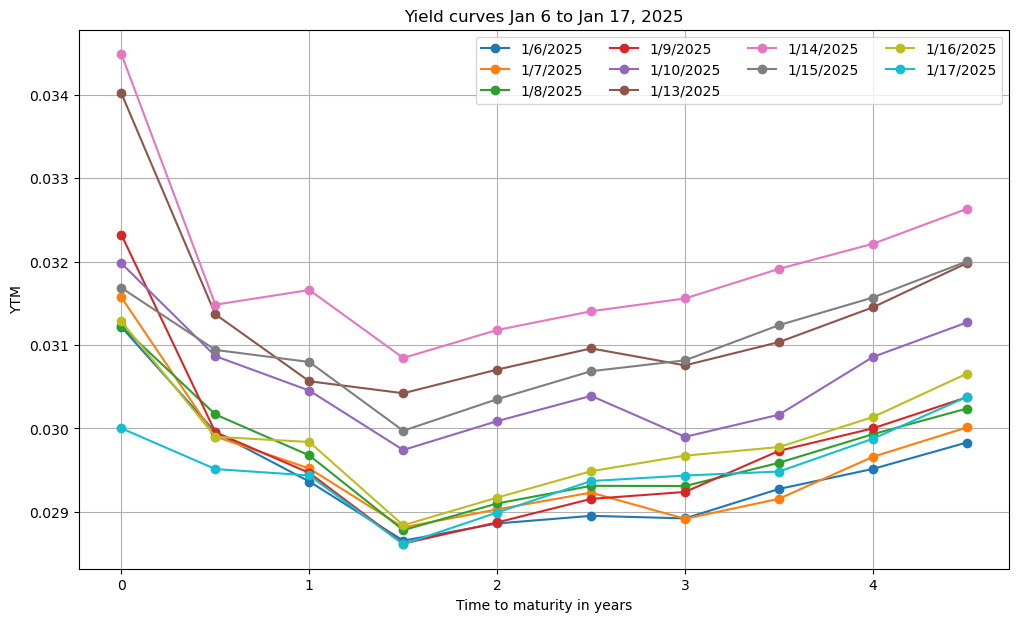

In [7]:
# Plotting YTM
YTM_combined = pd.concat([df1['YTM'], df2['YTM'], df3['YTM'], df4['YTM'], df5['YTM'], df6['YTM'], df7['YTM'], df8['YTM'], df9['YTM'], df10['YTM']], axis=1)

YTM_combined.columns = record_dates

x = list(np.arange(0, 5, 0.5))

plt.figure(figsize=(12, 7))
for date in YTM_combined.columns:
    plt.plot(x, YTM_combined[date], marker = 'o', linestyle='-', label = date)

plt.xlabel('Time to maturity in years')
plt.ylabel('YTM')
plt.title('Yield curves Jan 6 to Jan 17, 2025')
plt.legend(loc = 'upper right', fontsize = 10, ncol=4)
plt.grid(True)
plt.show()

## Question 4b

In [8]:
# Define the data sets
dic1 = df1.to_dict(orient='records')

dic2 = df2.to_dict(orient='records')

dic3 = df3.to_dict(orient='records')

dic4 = df4.to_dict(orient='records')

dic5 = df5.to_dict(orient='records')

dic6 = df6.to_dict(orient='records')

dic7 = df7.to_dict(orient='records')

dic8 = df8.to_dict(orient='records')

dic9 = df9.to_dict(orient='records')

dic10 = df10.to_dict(orient='records')

In [9]:
# Define spot function
def bootstrapping(data, record_date):
    """
    Bootstrapping to get the spot curve from the lecture.
    """
    face_value = 100
    
    record_date = pd.Timestamp(record_date)
    
    spot = {}
    
    for bond in data:
        maturity_date = bond['Maturity date']
        T = (maturity_date - record_date).days / 365
        dprice = bond['Dirty prices']
        coupon = bond['Coupon rate'] * 100 / 2
        
        if 0 <= T and T <= 1/2:
            r_T = -np.log((dprice / (100 + coupon))) / T
        
        elif T > 1/2:
            if T > 1 / 2 and T < 1:
                term = sum(coupon * np.exp(-spot[t] * t) for t in spot if round(t, 2) < 1/2)
                equation = lambda rT: dprice - (term + ((100 + coupon) * np.exp(-rT * T)))
                r_T = fsolve(equation, 0.05)[0]
                
            elif 1 <= T:
                term = sum(coupon * np.exp(-spot[t] * t) for t in spot if t < T and 1/2 <= t)
                equation = lambda rT: dprice - (term + ((100 + coupon) * np.exp(-rT * T)))
                r_T = fsolve(equation, 0.05)[0]
        spot[T] = r_T
    
    return spot

In [10]:
# Calculating spot rate
spot1 = pd.DataFrame(bootstrapping(dic1, record_dates[0]).values())

spot2 = pd.DataFrame(bootstrapping(dic2, record_dates[1]).values())

spot3 = pd.DataFrame(bootstrapping(dic3, record_dates[2]).values())

spot4 = pd.DataFrame(bootstrapping(dic4, record_dates[3]).values())

spot5 = pd.DataFrame(bootstrapping(dic5, record_dates[4]).values())

spot6 = pd.DataFrame(bootstrapping(dic6, record_dates[5]).values())

spot7 = pd.DataFrame(bootstrapping(dic7, record_dates[6]).values())

spot8 = pd.DataFrame(bootstrapping(dic8, record_dates[7]).values())

spot9 = pd.DataFrame(bootstrapping(dic9, record_dates[8]).values())

spot10 = pd.DataFrame(bootstrapping(dic10, record_dates[9]).values())

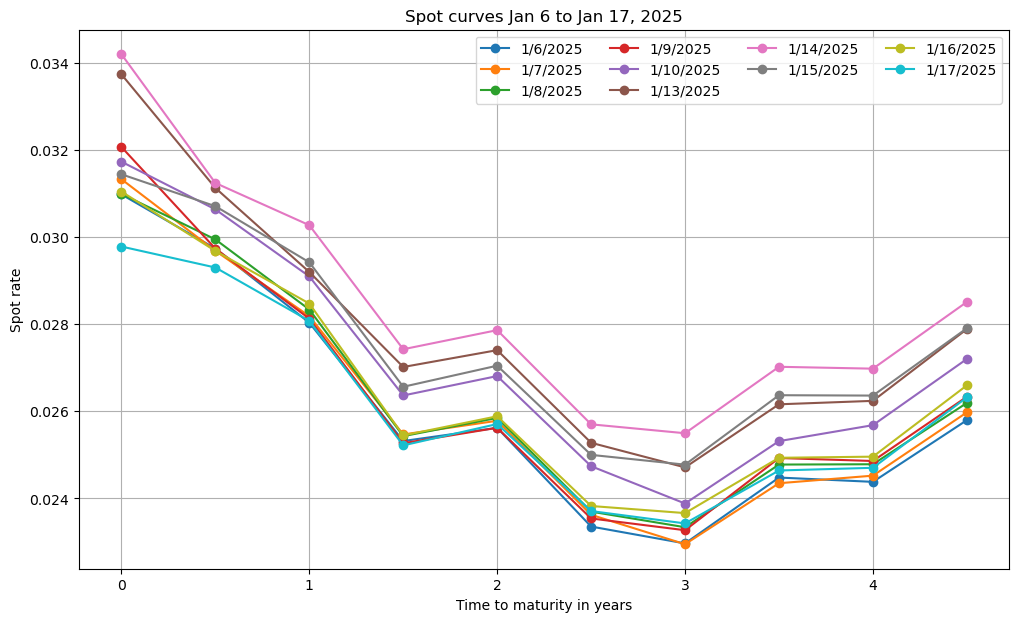

In [11]:
# Plotting spot curves
spot_combined = pd.concat([spot1, spot2, spot3, spot4, spot5, spot6, spot7, spot8, spot9, spot10], axis=1)

spot_combined.columns = record_dates

x = list(np.arange(0, 5, 0.5))

plt.figure(figsize=(12, 7))
for date in spot_combined.columns:
    plt.plot(x, spot_combined[date], marker = 'o', linestyle='-', label = date)

plt.xlabel('Time to maturity in years')
plt.ylabel('Spot rate')
plt.title('Spot curves Jan 6 to Jan 17, 2025')
plt.legend(loc = 'upper right', fontsize = 10, ncol=4)
plt.grid(True)
plt.show()

## Question 4c

In [12]:
# Define spot rates for integer years 1,2,3,4,5 using interpolation
def spot_int(df, record_date):
    """
    This function calculate the spot rate in integer year using interpolation
    method from the lecture
    """
    time_stamp = list(bootstrapping(df, record_date).keys())
    
    spots = bootstrapping(df, record_date)
    
    int_spot = {}
    
    int_spot['Year 1 spot rate'] = ((time_stamp[2] - 1) / time_stamp[1]) * spots[time_stamp[1]] + \
    ((1 - time_stamp[1]) / time_stamp[1]) * spots[time_stamp[2]]
    
    int_spot['Year 2 spot rate'] = ((time_stamp[4] - 2) / time_stamp[3]) * spots[time_stamp[3]] + \
    ((2 - time_stamp[3]) / time_stamp[3]) * spots[time_stamp[4]]
    
    int_spot['Year 3 spot rate'] = ((time_stamp[6] - 3) / time_stamp[5]) * spots[time_stamp[5]] + \
    ((3 - time_stamp[6]) / time_stamp[5]) * spots[time_stamp[6]]
    
    int_spot['Year 4 spot rate'] = ((time_stamp[8] - 4) / time_stamp[7]) * spots[time_stamp[7]] + \
    ((4 - time_stamp[7]) / time_stamp[7]) * spots[time_stamp[8]]
    
    year_5_rate = (spots[time_stamp[9]] - spots[time_stamp[8]]) / (time_stamp[9] - time_stamp[8])
    
    int_spot['Year 5 spot rate'] = spots[time_stamp[9]] + year_5_rate * (5 - time_stamp[9])
    
    return int_spot

In [13]:
# Calculate interger spot rate
spot_int1 = spot_int(dic1, record_dates[0])

spot_int2 = spot_int(dic2, record_dates[1])

spot_int3 = spot_int(dic3, record_dates[2])

spot_int4 = spot_int(dic4, record_dates[3])

spot_int5 = spot_int(dic5, record_dates[4])

spot_int6 = spot_int(dic6, record_dates[5])

spot_int7 = spot_int(dic7, record_dates[6])

spot_int8 = spot_int(dic8, record_dates[7])

spot_int9 = spot_int(dic9, record_dates[8])

spot_int10 = spot_int(dic10, record_dates[9])

In [14]:
# Define forward rate calculation using formula
def forward_rate(spot_int_data):
    """
    Calculate the forward rate
    """
    forward = {}
    
    forward["year 1 to year 2"] = ((1 + spot_int_data['Year 2 spot rate']) ** 2 / ((1 + spot_int_data['Year 1 spot rate']))) - 1
    
    forward["year 2 to year 3"] = ((1 + spot_int_data['Year 3 spot rate']) ** 3 / ((1 + spot_int_data['Year 2 spot rate']) ** 2)) - 1
    
    forward["year 3 to year 4"] = ((1 + spot_int_data['Year 4 spot rate']) ** 4 / ((1 + spot_int_data['Year 3 spot rate']) ** 3)) - 1
    
    forward["year 4 to year 5"] = ((1 + spot_int_data['Year 5 spot rate']) ** 5 / ((1 + spot_int_data['Year 4 spot rate']) ** 4)) - 1
    
    return forward

In [15]:
# Calculate forward rate
forward1 = pd.DataFrame(forward_rate(spot_int1).values())

forward2 = pd.DataFrame(forward_rate(spot_int2).values())

forward3 = pd.DataFrame(forward_rate(spot_int3).values())

forward4 = pd.DataFrame(forward_rate(spot_int4).values())

forward5 = pd.DataFrame(forward_rate(spot_int5).values())

forward6 = pd.DataFrame(forward_rate(spot_int6).values())

forward7 = pd.DataFrame(forward_rate(spot_int7).values())

forward8 = pd.DataFrame(forward_rate(spot_int8).values())

forward9 = pd.DataFrame(forward_rate(spot_int9).values())

forward10 = pd.DataFrame(forward_rate(spot_int10).values())

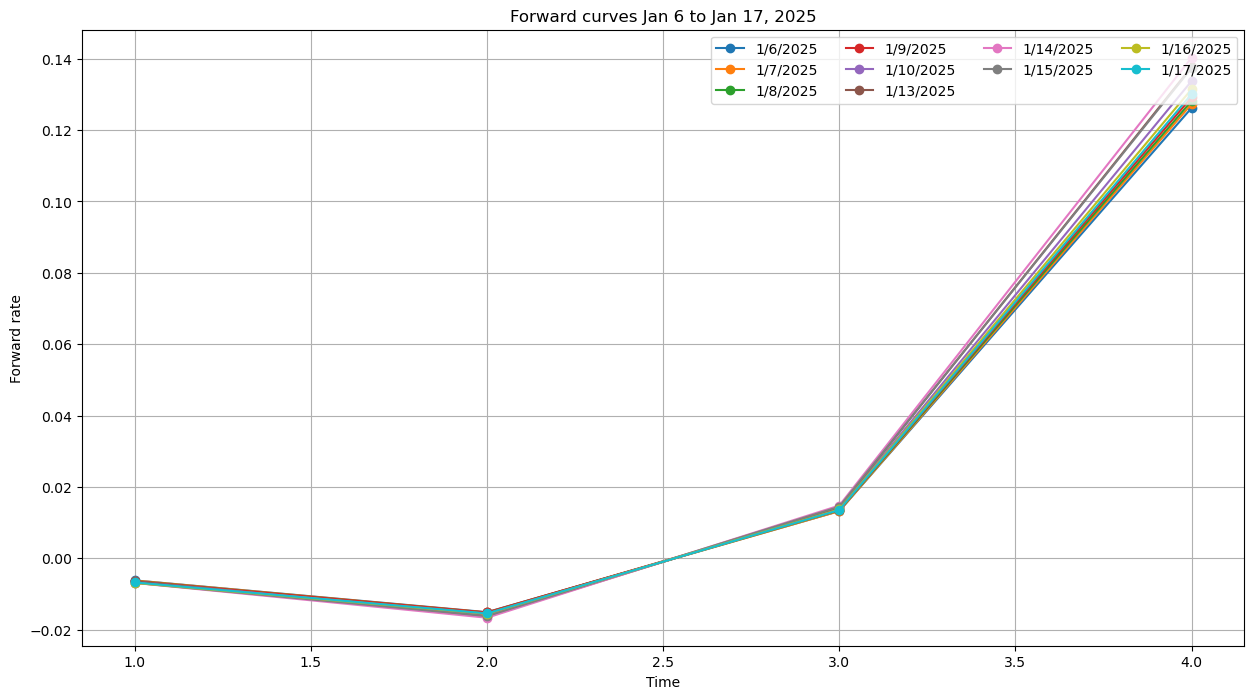

In [16]:
# Plot forward rate
forward_combined = pd.concat([forward1, forward2, forward3, forward4, forward5, forward6, forward7, forward8, forward9, forward10], axis=1)

forward_combined.columns = record_dates

x = list(np.arange(1, 5, 1))

plt.figure(figsize=(15, 8))
for date in forward_combined.columns:
    plt.plot(x, forward_combined[date], marker = 'o', linestyle='-', label = date)

plt.xlabel('Time')
plt.ylabel('Forward rate')
plt.title('Forward curves Jan 6 to Jan 17, 2025')
plt.legend(loc = 'upper right', fontsize = 10, ncol=4)
plt.grid(True)
plt.show()

# Question 5

In [17]:
# Selecting bonds that are mature in september for YTM covariance
filtered_YTM = YTM_combined.iloc[[1, 3, 5, 7, 9]]

filtered_YTM

,1/6/2025,1/7/2025,1/8/2025,1/9/2025,1/10/2025,1/13/2025,1/14/2025,1/15/2025,1/16/2025,1/17/2025
1,0.029956,0.029903,0.030168,0.029956,0.030868,0.031369,0.031484,0.030942,0.029900,0.029513
3,0.028656,0.028814,0.028782,0.028621,0.029742,0.030423,0.030845,0.029973,0.028840,0.028613
5,0.028953,0.029232,0.029313,0.029156,0.030391,0.030960,0.031405,0.030687,0.029488,0.029370
7,0.029276,0.029158,0.029589,0.029732,0.030166,0.031036,0.031913,0.031239,0.029777,0.029484
9,0.029832,0.030013,0.030239,0.030374,0.031270,0.031983,0.032632,0.032003,0.030657,0.030378


In [18]:
# Calculate YTM covariance matrix
columns = filtered_YTM.columns.tolist()

log_return = {}

for i in range(0, 9):
    first = columns[i]
    second = columns[i+1]
    
    log_return[i] = np.log(filtered_YTM[second] / filtered_YTM[first])

log_return = pd.DataFrame(log_return)

cov_YTM = log_return.cov()

cov_YTM

,0,1,2,3,4,5,6,7,8
0,0.000033,-0.000027,-0.000009,0.000051,-9.116313e-06,-0.000007,-0.000011,0.000006,1.512600e-05
1,-0.000027,0.000036,0.000023,-0.000059,1.189955e-05,0.000024,0.000018,-0.000017,-1.095641e-05
2,-0.000009,0.000023,0.000034,-0.000045,2.175779e-05,0.000046,0.000006,-0.000027,-1.898415e-06
3,0.000051,-0.000059,-0.000045,0.000111,-3.337513e-05,-0.000057,-0.000020,0.000036,1.995725e-05
4,-0.000009,0.000012,0.000022,-0.000033,2.203425e-05,0.000039,-0.000006,-0.000022,4.357471e-07
5,-0.000007,0.000024,0.000046,-0.000057,3.898056e-05,0.000079,-0.000006,-0.000045,6.844315e-06
6,-0.000011,0.000018,0.000006,-0.000020,-5.540309e-06,-0.000006,0.000019,0.000001,-8.137022e-06
7,0.000006,-0.000017,-0.000027,0.000036,-2.182975e-05,-0.000045,0.000001,0.000026,-3.135664e-06
8,0.000015,-0.000011,-0.000002,0.000020,4.357471e-07,0.000007,-0.000008,-0.000003,1.072646e-05


In [19]:
type(cov_YTM)

pandas.core.frame.DataFrame

In [20]:
# Calculate forward covariance matrix
columns = forward_combined.columns.tolist()

log_forward = {}

for i in range(0, 9):
    first = columns[i]
    second = columns[i+1]
    
    log_return[i] = np.log(forward_combined[second] / forward_combined[first])

log_forward = pd.DataFrame(log_return)

cov_forward = log_forward.cov()

cov_forward

,0,1,2,3,4,5,6,7,8
0,7.994268e-06,1.991937e-07,2.634458e-05,-1.097049e-05,-2.820915e-06,-5.552949e-06,1.534651e-05,-6.774136e-06,-8.161447e-06
1,1.991937e-07,4.963321e-09,6.564294e-07,-2.733525e-07,-7.028891e-08,-1.383632e-07,3.823900e-07,-1.687916e-07,-2.033593e-07
2,2.634458e-05,6.564294e-07,8.681680e-05,-3.615253e-05,-9.296137e-06,-1.829937e-05,5.057341e-05,-2.232371e-05,-2.689550e-05
3,-1.097049e-05,-2.733525e-07,-3.615253e-05,1.505476e-05,3.871128e-06,7.620285e-06,-2.105994e-05,9.296114e-06,1.119991e-05
4,-2.820915e-06,-7.028891e-08,-9.296137e-06,3.871128e-06,9.954083e-07,1.959454e-06,-5.415281e-06,2.390370e-06,2.879907e-06
5,-5.552949e-06,-1.383632e-07,-1.829937e-05,7.620285e-06,1.959454e-06,3.857169e-06,-1.065994e-05,4.705425e-06,5.669074e-06
6,1.534651e-05,3.823900e-07,5.057341e-05,-2.105994e-05,-5.415281e-06,-1.065994e-05,2.946054e-05,-1.300424e-05,-1.566744e-05
7,-6.774136e-06,-1.687916e-07,-2.232371e-05,9.296114e-06,2.390370e-06,4.705425e-06,-1.300424e-05,5.740228e-06,6.915799e-06
8,-8.161447e-06,-2.033593e-07,-2.689550e-05,1.119991e-05,2.879907e-06,5.669074e-06,-1.566744e-05,6.915799e-06,8.332122e-06


# Question 6

In [21]:
# Eigenvalue and eigenvector for YTM covariance
YTM_matrix = cov_YTM.values

eigenvalues_YTM, eigenvectors_YTM = np.linalg.eig(YTM_matrix)

print("Eigenvalues of the covariance matrix for YTM are:")
print(eigenvalues_YTM)

print("\nEigenvectors of the covariance matrix for YTM are:")
print(eigenvectors_YTM)

Eigenvalues of the covariance matrix for YTM are:
[ 2.57359573e-04+0.00000000e+00j  8.88952243e-05+0.00000000e+00j
  1.94325411e-05+0.00000000e+00j  5.52620480e-06+0.00000000e+00j
  1.26964718e-20+0.00000000e+00j -3.56400961e-21+1.07786928e-21j
 -3.56400961e-21-1.07786928e-21j  1.74115743e-21+0.00000000e+00j
  5.43415135e-21+0.00000000e+00j]

Eigenvectors of the covariance matrix for YTM are:
[[ 0.23317347+0.j         -0.40714685+0.j         -0.44735777+0.j
   0.14096117+0.j         -0.65900773+0.j         -0.04768259-0.08346669j
  -0.04768259+0.08346669j  0.16368439+0.j          0.07362856+0.j        ]
 [-0.32098816+0.j          0.28421142+0.j         -0.2935712 +0.j
  -0.43842276+0.j         -0.19204147+0.j         -0.62981727+0.j
  -0.62981727-0.j          0.3270911 +0.j          0.05484663+0.j        ]
 [-0.32174527+0.j         -0.18504684+0.j         -0.38076815+0.j
   0.6006772 +0.j          0.13533167+0.j         -0.31326186+0.09392845j
  -0.31326186-0.09392845j -0.32324789+0.j 

In [22]:
# Eigenvalues and Eigenvectors for forward covariance
forward_matrix = cov_forward.values

eigenvalues_forward, eigenvectors_forward = np.linalg.eig(forward_matrix)

print("Eigenvalues of the covariance matrix for forward are:")
print(eigenvalues_forward)

print("\nEigenvectors of the covariance matrix for forward are:")
print(eigenvectors_forward)

Eigenvalues of the covariance matrix for forward are:
[ 0.00000000e+00  1.58256249e-04 -3.82727535e-20  2.53855276e-20
  5.86151025e-21 -1.33017309e-21 -1.21952142e-23  8.56222240e-22
  2.05733297e-21]

Eigenvectors of the covariance matrix for forward are:
[[-9.74415359e-01 -2.24754775e-01 -7.25024350e-02 -1.51596297e-01
   1.47952590e-01 -2.04594070e-01 -9.71788798e-01  7.06998380e-02
   1.30345735e-01]
 [ 1.29172639e-03 -5.60022824e-03 -1.24872837e-03 -4.90191517e-03
   1.29665907e-03 -7.46505414e-03 -1.17617979e-02  1.51733145e-02
  -2.64774786e-04]
 [ 1.70838698e-01 -7.40664361e-01 -3.17117706e-01 -5.25488307e-01
  -2.68169725e-02  3.16633474e-02  1.74185753e-01 -3.75626137e-02
  -2.28981042e-02]
 [-7.11412074e-02  3.08429866e-01  4.72706221e-01 -7.08450302e-01
  -5.52991444e-02  2.21457258e-02 -5.54600968e-02 -2.13878518e-01
  -3.32022880e-01]
 [-1.82930030e-02  7.93085847e-02  2.67822883e-01 -2.88236138e-01
   2.11340706e-02  1.76906998e-01 -4.04824530e-02  4.01588142e-01
   7.8